# Assignment 2: APIs and Working with Data

This assignment covers **Chapters 5-8** from the [textbook](https://wesmckinney.com/book/) as well as lecture material from Weeks 1-3. Please complete this assignment by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

In [4]:
from requests import get

import numpy as np
import pandas as pd
import datetime

### Census API

From the Census API, get the mean family income for each county in the US, as well as the percent of people within those counties that identify as only White, only Black or African American, only Asian, only American Indian and Alaska Native, and Hispanic or Latino. These variables are:

- `NAME`: Name of the county
- `DP03_0087E`: Mean income
- `DP05_0037PE`: Percent of people who identify only as White
- `DP05_0038PE`: Percent of people who identify only as Black or African American
- `DP05_0039PE`: Percent of people who identify only as American Indian or Alaska Native
- `DP05_0044PE`: Percent of people who identify only as Asian
- `DP05_0072PE`: Percent of people who identify as Hispanic or Latino

Make a Data Frame that contains all of this information, with each row representing a county and each column representing the above variables as well as the state and county codes (the API should provide these for you without needing to ask for it). Name the columns something more descriptive (for example, `mean_income` instead of `DP03_0087E`). Make sure that the values are numeric rather than strings (the Census API should return them as strings). Remove any rows that contain values below 0 for any variable.

Using this dataset, answer the following questions. 
1) Describe the mean income variable. What is the county with the highest mean income? The lowest?
2) Does there seem to be a relationship between the mean income of a county and the percentage of people who identify as White? Look at a scatterplot to answer this question. Repeat this comparison with mean income for each of the other Race/Ethnicity variables. 
    > To make a scatterplot, you can use the `plot.scatter` method and put the names of the two columns you want to graph as the arguments. For example, you would use df.plot.scatter('x','y') if 'x' and 'y' are the column names of what you want to graph in df.
3) Maryland is state code 24. For the counties in Maryland, is the relationship the same as or different from counties in the US as a whole?




In [95]:
# or
with open('census-key.txt', 'r') as f:
    census_key = f.readline()


In [96]:
census_base_url = 'https://api.census.gov/data/2020/acs/acs5/profile'


census_params = {'get':'NAME,DP03_0087E,DP05_0037PE,DP05_0038PE,DP05_0039PE,DP05_0044PE,DP05_0072PE',
                 'for':'county:*',
                 'key':census_key}

r = get(census_base_url, params = census_params)
r.status_code
r.url

'https://api.census.gov/data/2020/acs/acs5/profile?get=NAME%2CDP03_0087E%2CDP05_0037PE%2CDP05_0038PE%2CDP05_0039PE%2CDP05_0044PE%2CDP05_0072PE&for=county%3A%2A&key=92b86cfbbe9c3752096f53807640ce5c9946314e'

In [97]:
colnames = ['county', 'mean_income', 'pct_white', 'pct_black','pct_amerind','pct_asian','pct_hisp','state_code', 'county_code']
census_data = pd.DataFrame(r.json()[1:], columns=colnames)

# converting to numeric: 
census_data[colnames[1:]] = census_data[colnames[1:]].apply(func=lambda x: pd.to_numeric(x))



In [98]:
# checking numeric descriptions
census_data.describe()

,mean_income,pct_white,pct_black,pct_amerind,pct_asian,pct_hisp,state_code,county_code
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,83989.573735,81.195654,9.085688,1.912884,1.385191,6.821267,31.281590,102.849115
std,22303.218193,17.346831,14.498975,7.637889,2.831043,12.228205,16.282861,106.645178
min,19989.000000,3.300000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,71228.000000,73.600000,0.700000,0.100000,0.300000,1.100000,19.000000,35.000000
50%,81018.000000,87.700000,2.400000,0.300000,0.600000,2.500000,30.000000,79.000000
75%,93246.000000,94.000000,10.200000,0.800000,1.300000,6.100000,46.000000,133.000000
max,223262.000000,100.000000,87.800000,94.500000,42.600000,96.700000,72.000000,840.000000


# Q1

The highest income county is Marin County, CA. The lowest is Maricao Municipio, Puerto Rico. 


## Method 1

Use `idxmax()`, and `idxmin()` to get the index of the lowest and highest values, then pass those to `.iloc` 


In [99]:
# method 1 
highest_county = census_data.mean_income.idxmax()

lowest_county = census_data.mean_income.idxmin()

census_data.iloc[[lowest_county, highest_county]]

,county,mean_income,pct_white,pct_black,pct_amerind,pct_asian,pct_hisp,state_code,county_code
1169,"Maricao Municipio, Puerto Rico",19989,49.8,1.6,0.4,0.0,0.0,72,93
240,"Marin County, California",223262,76.7,2.3,0.3,5.8,7.0,6,41


## Method 2 

Sort by `mean_income` and then use `iloc` with negative indexing to get  the first and last row:

In [100]:
 
census_data.sort_values("mean_income").iloc[[0,-1]]

,county,mean_income,pct_white,pct_black,pct_amerind,pct_asian,pct_hisp,state_code,county_code
1169,"Maricao Municipio, Puerto Rico",19989,49.8,1.6,0.4,0.0,0.0,72,93
240,"Marin County, California",223262,76.7,2.3,0.3,5.8,7.0,6,41


# Q2

## Method 1
We can use `plot.scatter` and just write a separate line of code for each group. 



<Axes: xlabel='pct_hisp', ylabel='mean_income'>

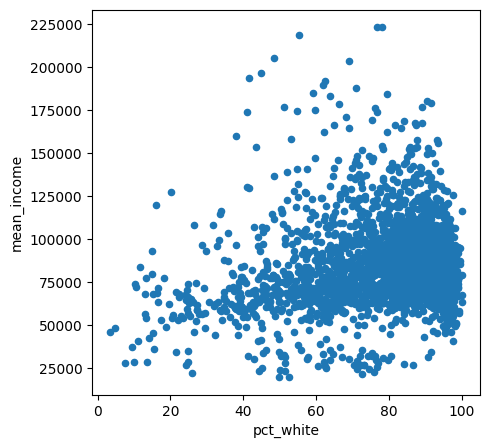

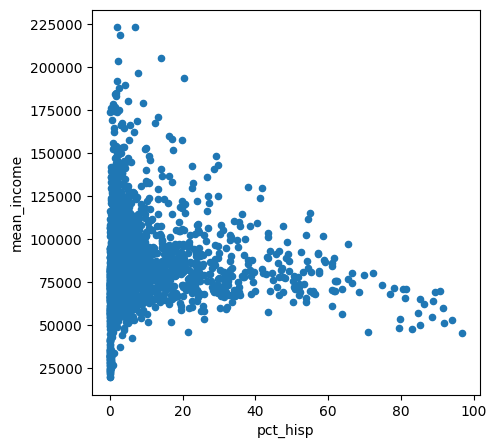

In [101]:
census_data.plot.scatter(x='pct_white', y='mean_income', figsize=(5,5)) 
census_data.plot.scatter(x='pct_hisp', y='mean_income', figsize=(5,5))
#census_data.plot.scatter(x='pct_black', y='mean_income', figsize=(5,5)) ...

## Method 2 

If we first use `melt` on our data to get it into long format, we can create a faceted plot using the seaborn package.

In [104]:
import seaborn as sns

# melting the data. Everything except the id_vars goes to long format: 
census_longer = census_data.melt(id_vars = ['county','state_code', 'county_code', 'mean_income'])
# sort by county name so you can see how this has changed: 
census_longer.sort_values('county').head(n=5)


,county,state_code,county_code,mean_income,variable,value
12458,"Abbeville County, South Carolina",45,1,69592,pct_asian,0.6
6016,"Abbeville County, South Carolina",45,1,69592,pct_black,27.2
9237,"Abbeville County, South Carolina",45,1,69592,pct_amerind,0.4
15679,"Abbeville County, South Carolina",45,1,69592,pct_hisp,0.4
2795,"Abbeville County, South Carolina",45,1,69592,pct_white,69.6


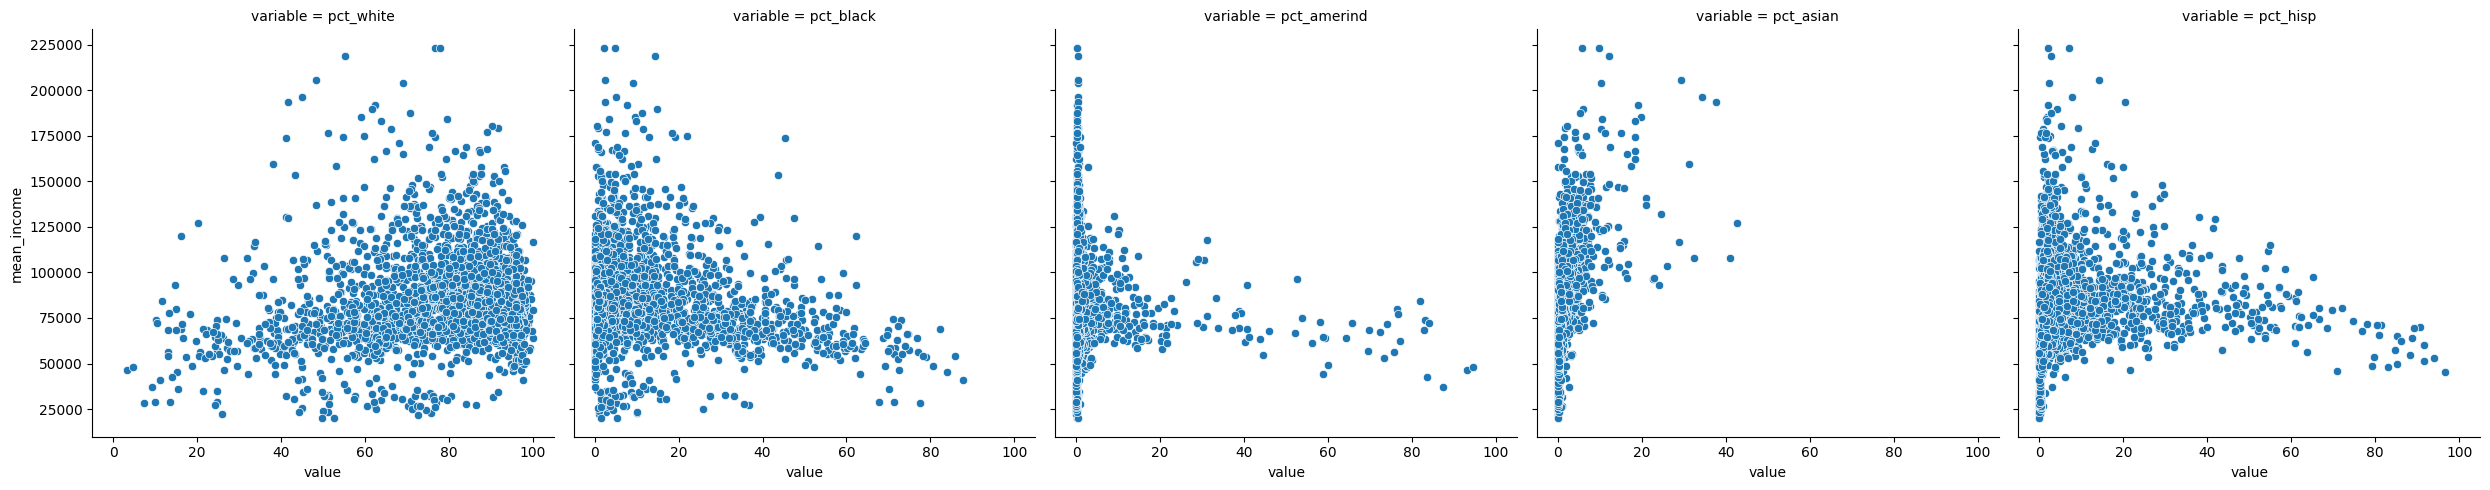

In [105]:
g = sns.relplot(kind='scatter', data=census_longer, x='value', y='mean_income', col='variable')


# Q3
Maryland is state code 24. For the counties in Maryland, is the relationship the same as or different from counties in the US as a whole?




Answer: The relationship is less apparent (or maybe even reversed) when we subset the data to include Maryland only.


<Axes: xlabel='pct_white', ylabel='mean_income'>

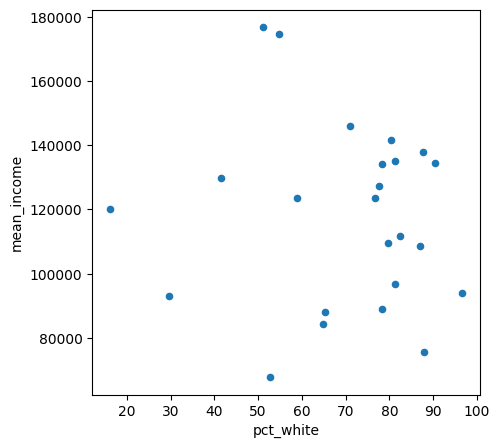

In [106]:
md_data = census_data.loc[census_data['state_code'] == 24]

md_data.plot.scatter(x='pct_white', y='mean_income', figsize=(5,5)) 




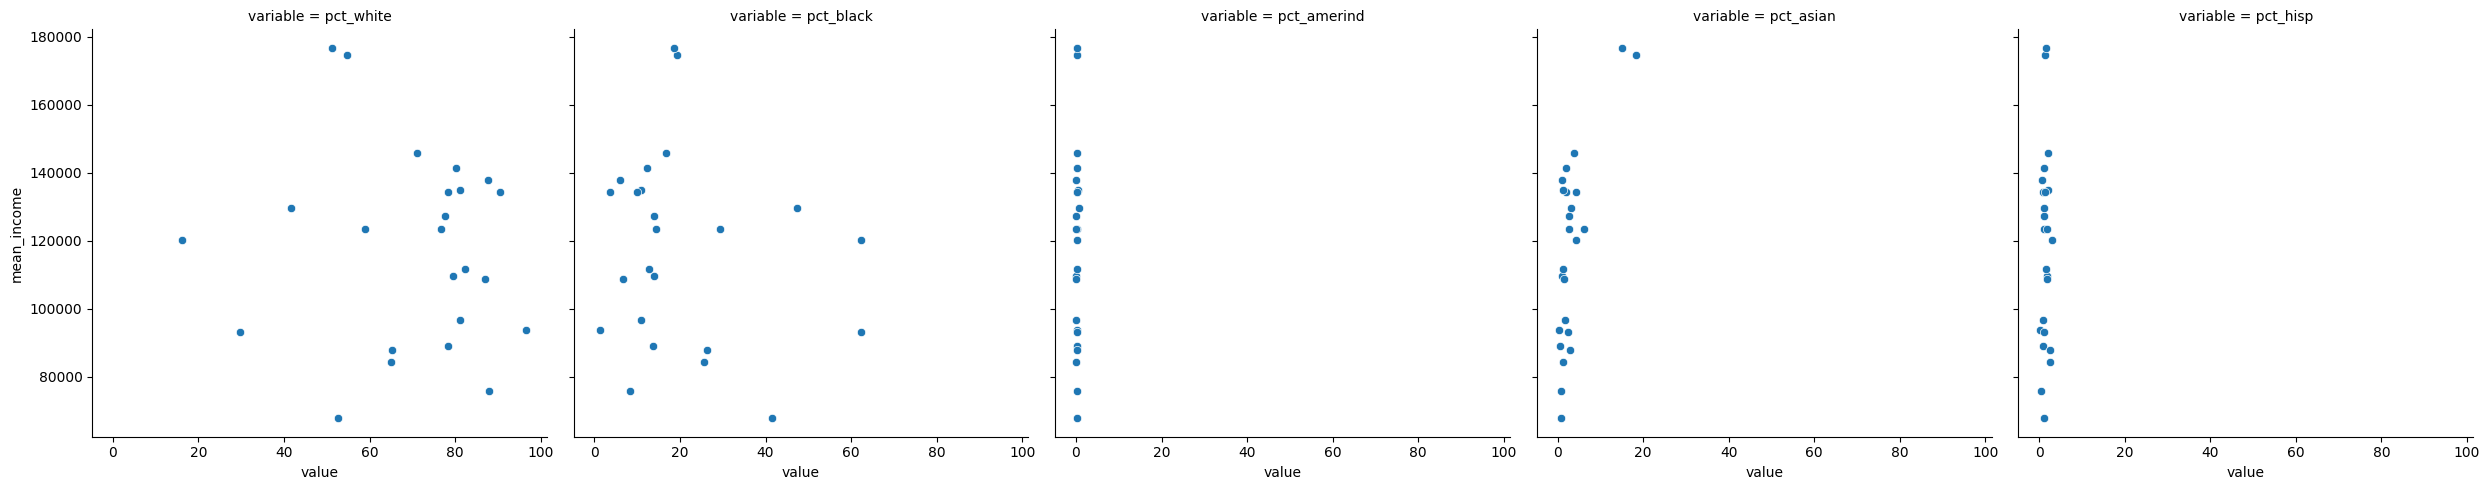

In [107]:
md_longer = census_longer.loc[census_longer['state_code'] == 24]

sns.relplot(kind='scatter', data=md_longer, x='value', y='mean_income', col='variable')


## Looking at a correlation matrix

If the relationship is unclear, you can look at correlations between matrix items instead and then compare/contrast:

In [108]:
number_cols = ['mean_income', 'pct_white', 'pct_black','pct_asian','pct_hisp','pct_amerind' ]

census_data[number_cols].corr()



,mean_income,pct_white,pct_black,pct_asian,pct_hisp,pct_amerind
mean_income,1.000000,0.126323,-0.159583,0.503761,-0.008055,-0.095403
pct_white,0.126323,1.000000,-0.765125,-0.268981,-0.068001,-0.363932
pct_black,-0.159583,-0.765125,1.000000,0.018397,-0.134208,-0.103411
pct_asian,0.503761,-0.268981,0.018397,1.000000,0.060087,-0.008773
pct_hisp,-0.008055,-0.068001,-0.134208,0.060087,1.000000,-0.017195
pct_amerind,-0.095403,-0.363932,-0.103411,-0.008773,-0.017195,1.000000


In [29]:
md_data[number_cols].corr()

,mean_income,pct_white,pct_black,pct_asian,pct_hisp,pct_amerind
mean_income,1.000000,-0.083026,-0.169308,0.705896,0.072143,0.231007
pct_white,-0.083026,1.000000,-0.947541,-0.387923,-0.426919,-0.474778
pct_black,-0.169308,-0.947541,1.000000,0.102135,0.365233,0.453406
pct_asian,0.705896,-0.387923,0.102135,1.000000,0.102505,0.246500
pct_hisp,0.072143,-0.426919,0.365233,0.102505,1.000000,-0.114312
pct_amerind,0.231007,-0.474778,0.453406,0.246500,-0.114312,1.000000
